# Outline materials

Each **geometry** has an associated **outline material** and an **outline width**. The **outline material** has all the same attributes as a normal material, but it is only applied in a thin line around each geometry primitive. The width of that line is the  **outline width**.

In [1]:
import fresnel
import math
scene = fresnel.Scene()
position = []
for k in range(5):
    for i in range(5):
        for j in range(5):
            position.append([2*i, 2*j, 2*k])
geometry = fresnel.geometry.Sphere(scene, position = position, radius=1.0)
geometry.color[::4] = fresnel.color.linear([0.25,0.5,1])
geometry.color[1::4] = fresnel.color.linear([1,0.714,0.169])
geometry.color[2::4] = fresnel.color.linear([0.42,0.267,1])
geometry.color[3::4] = fresnel.color.linear([1,0.874,0.169])
geometry.material = fresnel.material.Material(solid=0.0, primitive_color_mix=1.0, color=fresnel.color.linear([0,0,0]))
fresnel.light.cloudy();
scene.camera = fresnel.camera.Orthographic.fit(scene)

## Enabling outlines

The default **outline width** is 0. Set a non-zero outline width to enable the outlines.

In [2]:
geometry.outline_width

0.0

The **outline width** is in distance units in the same coordinate system as scene. The is *width* units wide perpendicular to the view direction. Outlines enhance the separation between primitives visually. They work well with diffuse and solid colored primitives.

In [3]:
geometry.outline_width = 0.12

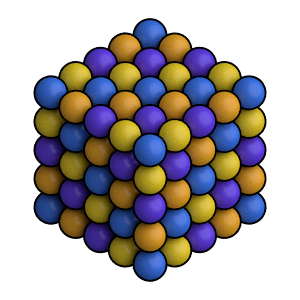

In [4]:
fresnel.pathtrace(scene, w=300, h=300,light_samples=40)

In [5]:
geometry.material.solid = 1.0

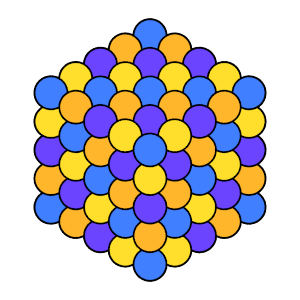

In [6]:
fresnel.preview(scene, w=300, h=300)

## Outline material properties

The default **outline material** is a solid black.

In [7]:
geometry.outline_material.color

(0.0, 0.0, 0.0)

In [8]:
geometry.outline_material.solid

1.0

In [9]:
geometry.outline_material.primitive_color_mix

0.0

The **outline material** has all the same properties as a normal material.

In [10]:
geometry.outline_material.color = fresnel.color.linear(fresnel.color.linear([0.08,0.341,0.9]))

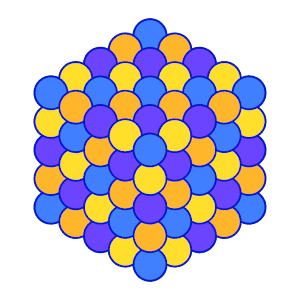

In [11]:
fresnel.preview(scene, w=300, h=300)

Outlines may be colored by the primitives:

In [12]:
geometry.material.primitive_color_mix = 0.0
geometry.outline_material.primitive_color_mix = 1.0
geometry.outline_width = 0.4

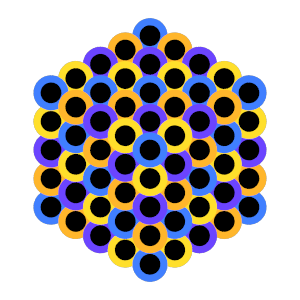

In [13]:
fresnel.preview(scene, w=300, h=300)

Outlines may have diffuse shading:

In [14]:
geometry.material.color = fresnel.color.linear([1,1,1])
geometry.material.solid = 0
geometry.outline_material.solid = 0

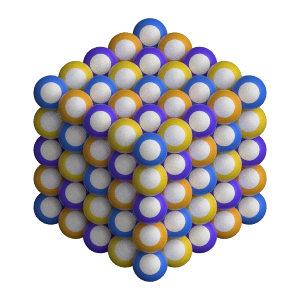

In [15]:
fresnel.pathtrace(scene, w=300, h=300,light_samples=40)

Or be metallic:

In [16]:
geometry.material.color = fresnel.color.linear([0.08,0.341,0.9])

geometry.outline_material.solid = 0
geometry.outline_material.color = [0.95,0.95,0.95]
geometry.outline_material.roughness = 0.1
geometry.outline_material.metal = 1
geometry.outline_material.primitive_color_mix = 0.0
geometry.outline_width = 0.2

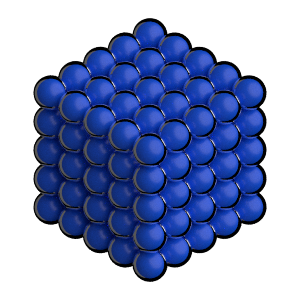

In [17]:
fresnel.pathtrace(scene, w=300, h=300,light_samples=40)

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://github.com/glotzerlab/fresnel-examples) repository.